## 0. Install and import dependencies

In [3]:
!pip3 install opencv-python matplotlib imageio gdown tensorflow

Defaulting to user installation because normal site-packages is not writeable
  Using cached opencv_python-4.10.0.84-cp37-abi3-macosx_11_0_arm64.whl (54.8 MB)
  Using cached imageio-2.35.1-py3-none-any.whl (315 kB)
  Using cached gdown-5.2.0-py3-none-any.whl (18 kB)
     |████████████████████████████████| 236.1 MB 1.6 MB/s eta 0:00:01
     |████████████████████████████████| 10.8 MB 4.3 MB/s eta 0:00:01
     |████████████████████████████████| 133 kB 4.9 MB/s eta 0:00:01
     |████████████████████████████████| 396 kB 5.2 MB/s eta 0:00:01
     |████████████████████████████████| 14.0 MB 3.0 MB/s eta 0:00:01
     |████████████████████████████████| 25.8 MB 1.7 MB/s eta 0:00:01    |██▏                             | 1.7 MB 4.2 MB/s eta 0:00:06
     |████████████████████████████████| 3.5 MB 745 kB/s eta 0:00:01
     |████████████████████████████████| 71 kB 405 kB/s eta 0:00:01
     |████████████████████████████████| 5.5 MB 839 kB/s eta 0:00:01
     |████████████████████████████████| 394 kB 2.2 

In [5]:
!pip3 list

Package                           Version
--------------------------------- --------------
absl-py                           2.1.0
altgraph                          0.17.2
anyio                             4.6.0
appnope                           0.1.4
argon2-cffi                       23.1.0
argon2-cffi-bindings              21.2.0
arrow                             1.3.0
asttokens                         2.4.1
astunparse                        1.6.3
async-lru                         2.0.4
attrs                             24.2.0
babel                             2.16.0
beautifulsoup4                    4.12.3
bleach                            6.1.0
certifi                           2024.8.30
cffi                              1.17.1
charset-normalizer                3.3.2
click                             8.1.7
comm                              0.2.2
contourpy                         1.3.0
cycler                            0.12.1
debugpy                           1.8.6
decorator        

In [6]:
import os
import cv2
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from typing import List
from matplotlib import pyplot as plt
import imageio

/Users/princekay/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
Matplotlib is building the font cache; this may take a moment.


In [7]:
tf.config.list_physical_devices('GPU')

[]

In [8]:
physical_devices = tf.config.list_physical_devices('GPU')
try:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
except:
    pass

## 1. Build Data Loading functions

In [9]:
import gdown

In [10]:
url = "https://drive.google.com/uc?id=1YlvpDLix3S-U8fd-gqRwPcWXAXm8JwjL"
output = "data.zip"
gdown.download(url, output, quiet=False)
gdown.extractall('data.zip')

Downloading...
From (original): https://drive.google.com/uc?id=1YlvpDLix3S-U8fd-gqRwPcWXAXm8JwjL
From (redirected): https://drive.google.com/uc?id=1YlvpDLix3S-U8fd-gqRwPcWXAXm8JwjL&confirm=t&uuid=a3b4c66b-544e-4d7a-9c2c-7330e380f066
To: /Users/princekay/programming/DA-ML-DS/DS/Lip Reading/data.zip
100%|██████████| 423M/423M [01:28<00:00, 4.80MB/s] 


['data/',
 'data/alignments/',
 'data/alignments/s1/',
 'data/alignments/s1/bbaf2n.align',
 'data/alignments/s1/bbaf3s.align',
 'data/alignments/s1/bbaf4p.align',
 'data/alignments/s1/bbaf5a.align',
 'data/alignments/s1/bbal6n.align',
 'data/alignments/s1/bbal7s.align',
 'data/alignments/s1/bbal8p.align',
 'data/alignments/s1/bbal9a.align',
 'data/alignments/s1/bbas1s.align',
 'data/alignments/s1/bbas2p.align',
 'data/alignments/s1/bbas3a.align',
 'data/alignments/s1/bbaszn.align',
 'data/alignments/s1/bbaz4n.align',
 'data/alignments/s1/bbaz5s.align',
 'data/alignments/s1/bbaz6p.align',
 'data/alignments/s1/bbaz7a.align',
 'data/alignments/s1/bbbf6n.align',
 'data/alignments/s1/bbbf7s.align',
 'data/alignments/s1/bbbf8p.align',
 'data/alignments/s1/bbbf9a.align',
 'data/alignments/s1/bbbm1s.align',
 'data/alignments/s1/bbbm2p.align',
 'data/alignments/s1/bbbm3a.align',
 'data/alignments/s1/bbbmzn.align',
 'data/alignments/s1/bbbs4n.align',
 'data/alignments/s1/bbbs5s.align',
 'data/al

In [80]:
def load_video(path:str) -> List[float]: 

    cap = cv2.VideoCapture(path)
    frames = []
    for _ in range(int(cap.get(cv2.CAP_PROP_FRAME_COUNT))): 
        ret, frame = cap.read()
        frame = tf.image.rgb_to_grayscale(frame)
        frames.append(frame[190:236,80:220,:])
    cap.release()
    
    mean = tf.math.reduce_mean(frames)
    std = tf.math.reduce_std(tf.cast(frames, tf.float32))
    return tf.cast((frames - mean), tf.float32) / std #standardize/scale the frames

In [81]:
vocab = [x for x in "abcdefghijklmnopqrstuvwxyz'?!123456789 "]

In [82]:
vocab

['a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 "'",
 '?',
 '!',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 ' ']

In [83]:
char_to_num = tf.keras.layers.StringLookup(vocabulary=vocab, oov_token="")
num_to_char = tf.keras.layers.StringLookup(
    vocabulary = char_to_num.get_vocabulary(), oov_token="", invert=True
)

print(
    f"The vocabulary is: {char_to_num.get_vocabulary()} "
    f"(size ={char_to_num.vocabulary_size()})"
)

The vocabulary is: ['', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', "'", '?', '!', '1', '2', '3', '4', '5', '6', '7', '8', '9', ' '] (size =40)


##

In [84]:
char_to_num.get_vocabulary()

['',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 "'",
 '?',
 '!',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 ' ']

In [85]:
char_to_num(['n', 'i','c','k'])

<tf.Tensor: shape=(4,), dtype=int64, numpy=array([14,  9,  3, 11])>

In [86]:
num_to_char([14,  9,  3, 11])

<tf.Tensor: shape=(4,), dtype=string, numpy=array([b'n', b'i', b'c', b'k'], dtype=object)>

In [87]:
def load_alignments(path:str) -> List[str]: 
    with open(path, 'r') as f: 
        lines = f.readlines() 
    tokens = []
    for line in lines:
        line = line.split()
        if line[2] != 'sil': 
            tokens = [*tokens,' ',line[2]]
    return char_to_num(tf.reshape(tf.strings.unicode_split(tokens, input_encoding='UTF-8'), (-1)))[1:]

In [102]:
def load_data(path: str):
    path = bytes.decode(path.numpy())
    file_name = path.split('/')[-1].split('.')[0]
    # file_name = path.split('\\')[-1].split('.')[0]
    video_path = os.path.join('data', 's1', f'{file_name}.mpg')
    alignment_path = os.path.join('data', 'alignments', 's1', f'{file_name}.align')
    frames = load_video(video_path)
    alignments = load_alignments(alignment_path)

    return frames, alignments

In [103]:
# /- for mac
# \\- for windows

test_path = './data/s1/bbal6n.mpg'

In [104]:
load_data(tf.convert_to_tensor(test_path))

(<tf.Tensor: shape=(75, 46, 140, 1), dtype=float32, numpy=
 array([[[[ 1.4622626 ],
          [ 1.4622626 ],
          [ 1.3832215 ],
          ...,
          [ 0.19760306],
          [ 0.19760306],
          [ 0.07904123]],
 
         [[ 1.4622626 ],
          [ 1.4622626 ],
          [ 1.3832215 ],
          ...,
          [ 0.19760306],
          [ 0.07904123],
          [ 0.03952061]],
 
         [[ 1.422742  ],
          [ 1.422742  ],
          [ 1.3832215 ],
          ...,
          [ 0.07904123],
          [ 0.11856184],
          [ 0.11856184]],
 
         ...,
 
         [[ 0.9089741 ],
          [ 0.9089741 ],
          [ 0.9089741 ],
          ...,
          [ 9.959194  ],
          [ 9.919674  ],
          [ 9.919674  ]],
 
         [[ 0.9089741 ],
          [ 0.9089741 ],
          [ 0.9089741 ],
          ...,
          [ 9.880154  ],
          [ 9.880154  ],
          [ 9.880154  ]],
 
         [[ 0.9089741 ],
          [ 0.9089741 ],
          [ 0.9089741 ],
          

In [105]:
frames

<tf.Tensor: shape=(75, 46, 140, 1), dtype=float32, numpy=
array([[[[ 1.4622626 ],
         [ 1.4622626 ],
         [ 1.3832215 ],
         ...,
         [ 0.19760306],
         [ 0.19760306],
         [ 0.07904123]],

        [[ 1.4622626 ],
         [ 1.4622626 ],
         [ 1.3832215 ],
         ...,
         [ 0.19760306],
         [ 0.07904123],
         [ 0.03952061]],

        [[ 1.422742  ],
         [ 1.422742  ],
         [ 1.3832215 ],
         ...,
         [ 0.07904123],
         [ 0.11856184],
         [ 0.11856184]],

        ...,

        [[ 0.9089741 ],
         [ 0.9089741 ],
         [ 0.9089741 ],
         ...,
         [ 9.959194  ],
         [ 9.919674  ],
         [ 9.919674  ]],

        [[ 0.9089741 ],
         [ 0.9089741 ],
         [ 0.9089741 ],
         ...,
         [ 9.880154  ],
         [ 9.880154  ],
         [ 9.880154  ]],

        [[ 0.9089741 ],
         [ 0.9089741 ],
         [ 0.9089741 ],
         ...,
         [ 9.880154  ],
         [ 9.88015

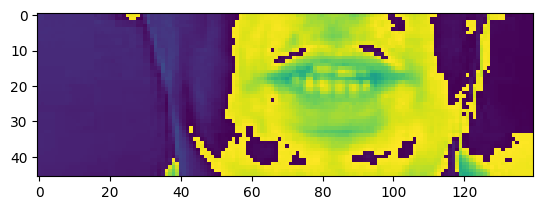

In [106]:
plt.imshow(frames[40])

In [107]:
alignments

<tf.Tensor: shape=(21,), dtype=int64, numpy=
array([ 2,  9, 14, 39,  2, 12, 21,  5, 39,  1, 20, 39, 12, 39, 19,  9, 24,
       39, 14, 15, 23])>

In [108]:
tf.strings.reduce_join([bytes.decode(x) for x in num_to_char(alignments.numpy()).numpy()])

<tf.Tensor: shape=(), dtype=string, numpy=b'bin blue at l six now'>

In [109]:
def mappable_function(path:str) -> List[str]:
    result = tf.py_function(load_data, [path], (tf.float32, tf.int64))
    return result

## 2. Create Data Pipeline

In [178]:
data = tf.data.Dataset.list_files('./data/s1/*.mpg')
data = data.shuffle(500, reshuffle_each_iteration=False)
data = data.map(mappable_function)
data = data.padded_batch(2, padded_shapes=([75,None,None,None],[40]))
data = data.prefetch(tf.data.AUTOTUNE)

train = data.take(450)
test = data.skip(450)

In [140]:
len(test)

50

In [141]:
frames, alignments = data.as_numpy_iterator().next()

In [142]:
len(frames)

2

In [143]:
sample = data.as_numpy_iterator()

In [144]:
val=sample.next(); val[0]

array([[[[[1.367458  ],
          [1.367458  ],
          [1.367458  ],
          ...,
          [8.926462  ],
          [9.382281  ],
          [9.5722065 ]],

         [[1.367458  ],
          [1.367458  ],
          [1.367458  ],
          ...,
          [9.154371  ],
          [9.458251  ],
          [9.458251  ]],

         [[1.2535032 ],
          [1.2535032 ],
          [1.2155182 ],
          ...,
          [0.07596989],
          [0.11395483],
          [0.11395483]],

         ...,

         [[0.94962364],
          [0.94962364],
          [0.8736537 ],
          ...,
          [9.458251  ],
          [9.610191  ],
          [9.610191  ]],

         [[0.94962364],
          [0.94962364],
          [0.8736537 ],
          ...,
          [9.192357  ],
          [9.382281  ],
          [9.534222  ]],

         [[0.94962364],
          [0.94962364],
          [0.8736537 ],
          ...,
          [9.230342  ],
          [9.382281  ],
          [9.458251  ]]],


        [[[1.3294

In [119]:
# imageio doesn't work on
# imageio.mimsave('./animation.gif', val[0][0], fps=10)

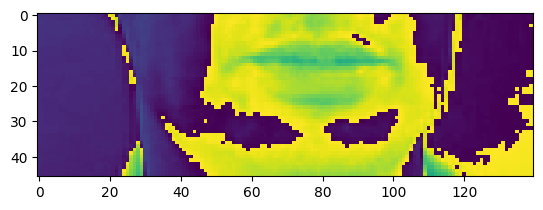

In [120]:
plt.imshow(val[0][0][35])

In [145]:
tf.strings.reduce_join([num_to_char(word) for word in val[1][0]])

<tf.Tensor: shape=(), dtype=string, numpy=b'bin blue at f five again'>

## 3. Design the Deep Neural Network

In [146]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv3D, LSTM, Dense, Dropout, Bidirectional, MaxPool3D, Activation, Reshape, SpatialDropout3D, BatchNormalization, TimeDistributed, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler

In [191]:
model = Sequential()
model.add(Conv3D(128, 3, input_shape=(75,46,140,1), padding='same'))
model.add(Activation('relu'))
model.add(MaxPool3D((1,2,2)))

model.add(Conv3D(256, 3, padding='same'))
model.add(Activation('relu'))
model.add(MaxPool3D((1,2,2)))

model.add(Conv3D(75, 3, padding='same'))
model.add(Activation('relu'))
model.add(MaxPool3D((1,2,2)))

model.add(TimeDistributed(Flatten()))  

initializer = tf.keras.initializers.Orthogonal()
model.add(Bidirectional(LSTM(128, kernel_initializer=initializer, return_sequences=True)))
model.add(Dropout(.5))

model.add(Bidirectional(LSTM(128, kernel_initializer=initializer, return_sequences=True)))
model.add(Dropout(.5))

model.add(Dense(char_to_num.vocabulary_size()+1, kernel_initializer='he_normal', activation='softmax'))

/Users/princekay/Library/Python/3.9/lib/python/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [192]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv3d_9 (Conv3D)               │ (None, 75, 46, 140,    │         3,584 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_9 (Activation)       │ (None, 75, 46, 140,    │             0 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling3d_9 (MaxPooling3D)  │ (None, 75, 23, 70,     │             0 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3d_10 (Conv3D)              │ (None, 75, 23, 70,     │       884,992 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_10 (Activation)      │ (None, 75, 23, 70,     │             0 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling3d_10 (MaxPooling3D) │ (None, 75, 11, 35,     │             0 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3d_11 (Conv3D)              │ (None, 75, 11, 35, 75) │       518,475 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_11 (Activation)      │ (None, 75, 11, 35, 75) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling3d_11 (MaxPooling3D) │ (None, 75, 5, 17, 75)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_3              │ (None, 75, 6375)       │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_6 (Bidirectional) │ (None, 75, 256)        │     6,660,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 75, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_7 (Bidirectional) │ (None, 75, 256)        │       394,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 75, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 75, 41)         │        10,537 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,471,924 (32.32 MB)

 Trainable params: 8,471,924 (32.32 MB)

 Non-trainable params: 0 (0.00 B)

In [163]:
yhat = model.predict(val[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


In [165]:
# tf.strings.reduce_join([num_to_char(tf.math.argmax(i)) for i in yhat[0]])
tf.strings.reduce_join([num_to_char(x) for x in tf.argmax(yhat[0],axis=1)])

<tf.Tensor: shape=(), dtype=string, numpy=b'wwwwwwwwuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuu'>

In [181]:
model.input_shape

(None, 75, 46, 140, 1)

In [182]:
model.output_shape

(None, 75, 41)

## 4. Setup Training Options and Train

In [183]:
def scheduler(epoch, lr):
    if epoch < 30:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

In [184]:
def CTCLoss(y_true, y_pred):
    batch_len = tf.cast(tf.shape(y_true)[0], dtype="int64")
    input_length = tf.cast(tf.shape(y_pred)[1], dtype="int64")
    label_length = tf.cast(tf.shape(y_true)[1], dtype="int64")

    input_length = input_length * tf.ones(shape=(batch_len, 1), dtype="int64")
    label_length = label_length * tf.ones(shape=(batch_len, 1), dtype="int64")

    loss = tf.keras.backend.ctc_batch_cost(y_true, y_pred, input_length, label_length)
    return loss

In [185]:
class ProduceExample(tf.keras.callbacks.Callback):
    def __init__(self, dataset)-> None:
        self.dataset=dataset.as_numpy_iterator()

    def on_epoch_end(self, epoch: int, logs=None) -> None:
        data = self.dataset.next()
        yhat = self.model.predict(data[0])
        decoded = tf.keras.backend.ctc_decode(yhat, [75, 75], greedy=True)[0][0].numpy()

        for x in range (len(yhat)):
            print('Original:', tf.strings.reduce_join(num_to_char(data[1][x])).numpy().decode('utf-8'))
            print('Prediction:', tf.strings.reduce_join(num_to_char(decoded[x])).numpy().decode('utf-8'))
            print('~'*100)

In [198]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss=CTCLoss, )

In [199]:
# checkpoint_callback = ModelCheckpoint(os.path.join('models', 'checkpoint'), monitor='loss', save_weights_only=True)
# Adjust the file path to end with '.weights.h5'
checkpoint_path = os.path.join('models', 'overlapped-weights368.weights.h5')

# Create the ModelCheckpoint callback
checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    monitor='loss',
    save_weights_only=True
)

In [200]:
schedule_callback = LearningRateScheduler(scheduler)

In [201]:
example_callback = ProduceExample(data)

In [202]:
model.fit(train, validation_data=test, epochs=100, callbacks=[checkpoint_callback, schedule_callback, example_callback])

Epoch 1/100


2024-10-10 14:56:17.387582: W tensorflow/core/framework/op_kernel.cc:1840] OP_REQUIRES failed at reshape_op.h:65 : INVALID_ARGUMENT: Only one input size may be -1, not both 0 and 1
2024-10-10 14:56:17.387622: W tensorflow/core/framework/op_kernel.cc:1840] OP_REQUIRES failed at reshape_op.h:65 : INVALID_ARGUMENT: Only one input size may be -1, not both 0 and 1
2024-10-10 14:56:17.387636: W tensorflow/core/framework/op_kernel.cc:1840] OP_REQUIRES failed at reshape_op.h:65 : INVALID_ARGUMENT: Only one input size may be -1, not both 0 and 1
2024-10-10 14:56:17.387644: W tensorflow/core/framework/op_kernel.cc:1840] OP_REQUIRES failed at reshape_op.h:65 : INVALID_ARGUMENT: Only one input size may be -1, not both 0 and 1
2024-10-10 14:56:17.387672: W tensorflow/core/framework/op_kernel.cc:1840] OP_REQUIRES failed at reshape_op.h:65 : INVALID_ARGUMENT: Only one input size may be -1, not both 0 and 1
2024-10-10 14:56:17.387677: W tensorflow/core/framework/op_kernel.cc:1840] OP_REQUIRES failed a

InvalidArgumentError: Graph execution error:

Detected at node sequential_3_1/time_distributed_3_1/Reshape_12 defined at (most recent call last):
  File "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/runpy.py", line 197, in _run_module_as_main

  File "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/runpy.py", line 87, in _run_code

  File "/Users/princekay/Library/Python/3.9/lib/python/site-packages/ipykernel_launcher.py", line 18, in <module>

  File "/Users/princekay/Library/Python/3.9/lib/python/site-packages/traitlets/config/application.py", line 1075, in launch_instance

  File "/Users/princekay/Library/Python/3.9/lib/python/site-packages/ipykernel/kernelapp.py", line 739, in start

  File "/Users/princekay/Library/Python/3.9/lib/python/site-packages/tornado/platform/asyncio.py", line 205, in start

  File "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/asyncio/base_events.py", line 596, in run_forever

  File "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/asyncio/base_events.py", line 1890, in _run_once

  File "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/asyncio/events.py", line 80, in _run

  File "/Users/princekay/Library/Python/3.9/lib/python/site-packages/ipykernel/kernelbase.py", line 545, in dispatch_queue

  File "/Users/princekay/Library/Python/3.9/lib/python/site-packages/ipykernel/kernelbase.py", line 534, in process_one

  File "/Users/princekay/Library/Python/3.9/lib/python/site-packages/ipykernel/kernelbase.py", line 437, in dispatch_shell

  File "/Users/princekay/Library/Python/3.9/lib/python/site-packages/ipykernel/ipkernel.py", line 362, in execute_request

  File "/Users/princekay/Library/Python/3.9/lib/python/site-packages/ipykernel/kernelbase.py", line 778, in execute_request

  File "/Users/princekay/Library/Python/3.9/lib/python/site-packages/ipykernel/ipkernel.py", line 449, in do_execute

  File "/Users/princekay/Library/Python/3.9/lib/python/site-packages/ipykernel/zmqshell.py", line 549, in run_cell

  File "/Users/princekay/Library/Python/3.9/lib/python/site-packages/IPython/core/interactiveshell.py", line 3048, in run_cell

  File "/Users/princekay/Library/Python/3.9/lib/python/site-packages/IPython/core/interactiveshell.py", line 3103, in _run_cell

  File "/Users/princekay/Library/Python/3.9/lib/python/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner

  File "/Users/princekay/Library/Python/3.9/lib/python/site-packages/IPython/core/interactiveshell.py", line 3308, in run_cell_async

  File "/Users/princekay/Library/Python/3.9/lib/python/site-packages/IPython/core/interactiveshell.py", line 3490, in run_ast_nodes

  File "/Users/princekay/Library/Python/3.9/lib/python/site-packages/IPython/core/interactiveshell.py", line 3550, in run_code

  File "/var/folders/dx/qwzq1yxs2qv3stc_90dz1lzw0000gn/T/ipykernel_4785/3536403359.py", line 1, in <module>

  File "/Users/princekay/Library/Python/3.9/lib/python/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/Users/princekay/Library/Python/3.9/lib/python/site-packages/keras/src/backend/tensorflow/trainer.py", line 320, in fit

  File "/Users/princekay/Library/Python/3.9/lib/python/site-packages/keras/src/backend/tensorflow/trainer.py", line 121, in one_step_on_iterator

  File "/Users/princekay/Library/Python/3.9/lib/python/site-packages/keras/src/backend/tensorflow/trainer.py", line 108, in one_step_on_data

  File "/Users/princekay/Library/Python/3.9/lib/python/site-packages/keras/src/backend/tensorflow/trainer.py", line 51, in train_step

  File "/Users/princekay/Library/Python/3.9/lib/python/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/Users/princekay/Library/Python/3.9/lib/python/site-packages/keras/src/layers/layer.py", line 899, in __call__

  File "/Users/princekay/Library/Python/3.9/lib/python/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/Users/princekay/Library/Python/3.9/lib/python/site-packages/keras/src/ops/operation.py", line 46, in __call__

  File "/Users/princekay/Library/Python/3.9/lib/python/site-packages/keras/src/utils/traceback_utils.py", line 156, in error_handler

  File "/Users/princekay/Library/Python/3.9/lib/python/site-packages/keras/src/models/sequential.py", line 213, in call

  File "/Users/princekay/Library/Python/3.9/lib/python/site-packages/keras/src/models/functional.py", line 182, in call

  File "/Users/princekay/Library/Python/3.9/lib/python/site-packages/keras/src/ops/function.py", line 171, in _run_through_graph

  File "/Users/princekay/Library/Python/3.9/lib/python/site-packages/keras/src/models/functional.py", line 584, in call

  File "/Users/princekay/Library/Python/3.9/lib/python/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/Users/princekay/Library/Python/3.9/lib/python/site-packages/keras/src/layers/layer.py", line 899, in __call__

  File "/Users/princekay/Library/Python/3.9/lib/python/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/Users/princekay/Library/Python/3.9/lib/python/site-packages/keras/src/ops/operation.py", line 46, in __call__

  File "/Users/princekay/Library/Python/3.9/lib/python/site-packages/keras/src/utils/traceback_utils.py", line 156, in error_handler

  File "/Users/princekay/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/time_distributed.py", line 108, in call

  File "/Users/princekay/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/time_distributed.py", line 108, in <listcomp>

  File "/Users/princekay/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/time_distributed.py", line 102, in step_function

  File "/Users/princekay/Library/Python/3.9/lib/python/site-packages/keras/src/layers/reshaping/flatten.py", line 54, in call

  File "/Users/princekay/Library/Python/3.9/lib/python/site-packages/keras/src/ops/numpy.py", line 4728, in reshape

  File "/Users/princekay/Library/Python/3.9/lib/python/site-packages/keras/src/backend/tensorflow/numpy.py", line 1851, in reshape

Only one input size may be -1, not both 0 and 1
	 [[{{node sequential_3_1/time_distributed_3_1/Reshape_12}}]] [Op:__inference_one_step_on_iterator_133939]

## 5. Make a Prediction

In [203]:
url = 'https://drive.google.com/uc?id=1vWscXs4Vt0a_1IH1-ct2TCgXAZT-N3_Y'
output = 'checkpoints.zip'
gdown.download(url, output, quiet=False)
gdown.extractall('checkpoints.zip', 'models')

Downloading...
From (original): https://drive.google.com/uc?id=1vWscXs4Vt0a_1IH1-ct2TCgXAZT-N3_Y
From (redirected): https://drive.google.com/uc?id=1vWscXs4Vt0a_1IH1-ct2TCgXAZT-N3_Y&confirm=t&uuid=618c9327-a229-4e32-98b9-895f905532f0
To: /Users/princekay/programming/DA-ML-DS/DS/Lip Reading/checkpoints.zip
100%|██████████| 94.5M/94.5M [00:19<00:00, 4.77MB/s]


['models/checkpoint.index',
 'models/__MACOSX/._checkpoint.index',
 'models/checkpoint.data-00000-of-00001',
 'models/__MACOSX/._checkpoint.data-00000-of-00001',
 'models/checkpoint',
 'models/__MACOSX/._checkpoint']

In [207]:
model.load_weights('models/checkpoint')
# checkpoint_path = os.path.join('models', 'unseen-weights178.h5')
# print(checkpoint_path)
# model.load_weights(checkpoint_path)

ValueError: File format not supported: filepath=models/checkpoint. Keras 3 only supports V3 `.keras` and `.weights.h5` files, or legacy V1/V2 `.h5` files.

In [ ]:
test_data = test.as_numpy_iterator()

In [ ]:
sample=test_data.next()

In [ ]:
yhat = model.predict(sample[0])

In [ ]:

print('~'*100, 'REAL TEXT')
[tf.strings.reduce_join([num_to_char(word) for word in sentence]) for sentence in sample[1]]

In [ ]:
decoded = tf.keras.backend.ctc_decode(yhat, input_length=[75,75], greedy=True)[0][0].numpy()

In [ ]:
print('~'*100, 'PREDICTIONS')
[tf.strings.reduce_join([num_to_char(word) for word in sentence]) for sentence in decoded]

## Test on a Video

sample = load_data(tf.convert_to_tensor('.\\data\\s1\\bras9a.mpg'))

In [ ]:
print('~'*100, 'REAL TEXT')
[tf.strings.reduce_join([num_to_char(word) for word in sentence]) for sentence in [sample[1]]]

In [ ]:
yhat = model.predict(tf.expand_dims(sample[0], axis=0))

In [ ]:
decoded = tf.keras.backend.ctc_decode(yhat, input_length=[75], greedy=True)[0][0].numpy()

In [ ]:
print('~'*100, 'PREDICTIONS')
[tf.strings.reduce_join([num_to_char(word) for word in sentence]) for sentence in decoded]